# **Breast Cancer Prediction**

 **Libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Breast_Cancer/Breast_Cancer.csv")
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [3]:
df.describe()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,30.473658,14.357107,4.158052,71.297962
std,8.963134,21.119696,8.099675,5.109331,22.921430
min,30.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


In [4]:
df.shape

(4024, 16)

In [5]:
df.tail()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
4019,62,Other,Married,T1,N1,IIA,Moderately differentiated,2,Regional,9,Positive,Positive,1,1,49,Alive
4020,56,White,Divorced,T2,N2,IIIA,Moderately differentiated,2,Regional,46,Positive,Positive,14,8,69,Alive
4021,68,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,22,Positive,Negative,11,3,69,Alive
4022,58,Black,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,44,Positive,Positive,11,1,72,Alive
4023,46,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,30,Positive,Positive,7,2,100,Alive


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [7]:
df.describe()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,30.473658,14.357107,4.158052,71.297962
std,8.963134,21.119696,8.099675,5.109331,22.921430
min,30.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


In [8]:
df.isnull().sum()

,0
Age,0
Race,0
Marital Status,0
T Stage,0
N Stage,0
6th Stage,0
differentiate,0
Grade,0
A Stage,0
Tumor Size,0


In [9]:
df.sample(5)

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
1331,46,Black,Married,T2,N1,IIB,Moderately differentiated,2,Regional,30,Positive,Positive,13,1,67,Alive
2209,54,White,Single,T1,N1,IIA,Well differentiated,1,Regional,14,Positive,Positive,2,1,97,Alive
1134,57,Black,Married,T1,N1,IIA,Moderately differentiated,2,Regional,10,Positive,Positive,10,2,58,Alive
3194,59,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,30,Positive,Positive,30,6,101,Alive
732,67,White,Widowed,T1,N1,IIA,Poorly differentiated,3,Regional,20,Positive,Positive,22,1,71,Alive


In [10]:
df.columns

Index(['Age', 'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')

In [11]:
df['Status'].value_counts()


,count
Status,
Alive,3408
Dead,616


<Axes: xlabel='Status'>

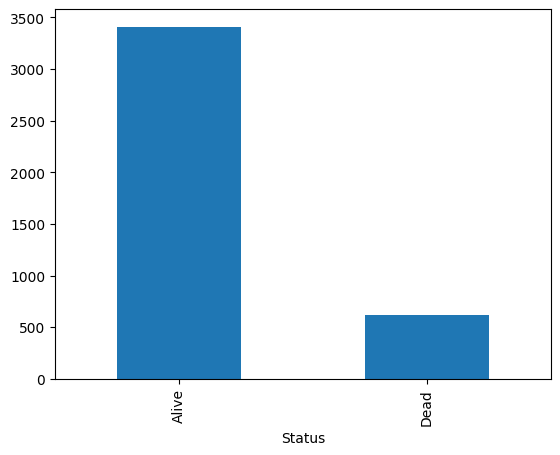

In [12]:
df['Status'].value_counts().plot(kind='bar')

**Preprocessing**

In [13]:
#Transform object to int
la = LabelEncoder()
# Selecting categorical and non-categorical columns
cat=df.select_dtypes(include='object')
num=df.select_dtypes(exclude='object')
cat.head()


,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Estrogen Status,Progesterone Status,Status
0,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,Positive,Positive,Alive
1,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,Positive,Positive,Alive
2,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,Positive,Positive,Alive
3,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,Positive,Positive,Alive
4,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,Positive,Positive,Alive


In [14]:
num.head()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
0,68,4,24,1,60
1,50,35,14,5,62
2,58,63,14,7,75
3,58,18,2,1,84
4,47,41,3,1,50


In [15]:
# Encoding categorical columns
for i in range(0,cat.shape[1]):
    cat.iloc[:,i]=la.fit_transform(cat.iloc[:,i])

cat.head()

,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Estrogen Status,Progesterone Status,Status
0,2,1,0,0,0,1,3,1,1,1,0
1,2,1,1,1,2,0,2,1,1,1,0
2,2,0,2,2,4,0,2,1,1,1,0
3,2,1,0,0,0,1,3,1,1,1,0
4,2,1,1,0,1,1,3,1,1,1,0


In [16]:
cat=cat.astype('int')

In [17]:
cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Race                 4024 non-null   int64
 1   Marital Status       4024 non-null   int64
 2   T Stage              4024 non-null   int64
 3   N Stage              4024 non-null   int64
 4   6th Stage            4024 non-null   int64
 5   differentiate        4024 non-null   int64
 6   Grade                4024 non-null   int64
 7   A Stage              4024 non-null   int64
 8   Estrogen Status      4024 non-null   int64
 9   Progesterone Status  4024 non-null   int64
 10  Status               4024 non-null   int64
dtypes: int64(11)
memory usage: 345.9 KB


In [29]:
df=df.concat([cat,num],axis=1)
df

AttributeError: 'DataFrame' object has no attribute 'concat'

**Model**

In [21]:
x=df.drop(['Status'],axis=1)
y=df['Status']
x

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,Other,Married,T1,N1,IIA,Moderately differentiated,2,Regional,9,Positive,Positive,1,1,49
4020,56,White,Divorced,T2,N2,IIIA,Moderately differentiated,2,Regional,46,Positive,Positive,14,8,69
4021,68,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,22,Positive,Negative,11,3,69
4022,58,Black,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,44,Positive,Positive,11,1,72


In [22]:
#Over Sampling

RS=RandomOverSampler(random_state=42)
x_rs,y_rs=RS.fit_resample(x,y)

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x_rs,y_rs, test_size=0.2, random_state=42)

In [24]:
Model_LR=LogisticRegression()
Model_RF=RandomForestClassifier()
Model_SVC=SVC()
Model_XGB=XGBClassifier()
Model_GBoosting=GradientBoostingClassifier()

In [26]:
def predictt(model):
    model.fit(x_train,y_train)
    model.predict(x_test)
    print(classification_report(model.predict(x_test),y_test))

In [27]:
predictt(Model_LR)

ValueError: could not convert string to float: 'White'

In [ ]:
predictt(Model_RF)


In [ ]:
predictt(Model_SVC)


In [ ]:
predictt(Model_XGB)

In [ ]:
predictt(Model_GBoosting)

In [ ]:
X=df.drop('diagnosis', axis=1)
y=df['diagnosis']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train ,y_test =train_test_split(X,y, test_size=0.2, random_state=0)

In [ ]:
# scaling data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train.shape


***LogisticRegression***

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

In [ ]:
y_pred = log_reg.predict(X_test)

In [ ]:
y_pred

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_train, log_reg.predict(X_train)))
log_reg_acc = accuracy_score(y_test, log_reg.predict(X_test))
print(log_reg_acc)
y_pred = log_reg.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

***KNeighbors Classifier***

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

In [ ]:
Y_pred = knn.predict(X_test)
Y_pred

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(Y_train, knn.predict(X_train)))
knn_acc = accuracy_score(Y_test, knn.predict(X_test))
print(knn_acc)
y_pred = knn.predict(X_test)
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

***SVC***

In [ ]:
#Hyperparameter tuning
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
svc= SVC(probability=True)

parameters = {
    'gamma': [0.0001, 0.001, 0.01, 0.1],
    'C':[0.01, 0.05, 0.5, 0.1, 1,10, 15,20]
}
grid_search = GridSearchCV(svc, parameters)
grid_search.fit(X_train, Y_train)

In [ ]:
grid_search.best_params_


In [ ]:
grid_search.best_score_


In [ ]:
svc = SVC(C=15, gamma=0.01, probability=True)
svc.fit(X_train, Y_train)

In [ ]:
Y_pred = svc.predict(X_test)
Y_pred

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(Y_train, svc.predict(X_train)))
svc_acc = accuracy_score(Y_test, svc.predict(X_test))
print(svc_acc)
Y_pred = svc.predict(X_test)
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

***DecisionTreeClassifier***

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

parameters = {
    'criterion':['gini','entropy'],
    'max_depth':range(2,32,1),
    'min_samples_leaf':range(1,10,1),
    'min_samples_split':range(2,10,1),
    'splitter':['best','random']
}

grid_search_dt = GridSearchCV(dtc, parameters, cv=5, n_jobs=-1, verbose=1)
grid_search_dt.fit(X_train, Y_train)

In [ ]:
grid_search_dt.best_params_


In [ ]:
grid_search_dt.best_score_


In [ ]:
dtc = DecisionTreeClassifier(criterion='gini', max_depth=29, min_samples_leaf=8, min_samples_split=3, splitter = 'random')

In [ ]:
dtc.fit(X_train, Y_train)


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(Y_train, dtc.predict(X_train)))
dtc_acc = accuracy_score(Y_test, dtc.predict(X_test))
print(dtc_acc)
Y_pred = dtc.predict(X_test)
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

***Random Forest Classifier***

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 10, max_features = 0.5, min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
rand_clf.fit(X_train, Y_train)

In [ ]:
Y_pred = rand_clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(Y_train, rand_clf.predict(X_train)))
rand_clf_acc = accuracy_score(Y_test, rand_clf.predict(X_test))
print(rand_clf_acc)
Y_pred = rand_clf.predict(X_test)
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

***Gradient Boosting Classifier***

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

parameters = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.001, 0.1],
    'n_estimators': [100, 150, 180]
}

grid_search_gbc = GridSearchCV(gbc, parameters, cv = 2, n_jobs = -5, verbose = 1)
grid_search_gbc.fit(X_train, Y_train)

In [ ]:
grid_search_gbc.best_params_

In [ ]:
grid_search_gbc.best_score_


In [ ]:
gbc = GradientBoostingClassifier(learning_rate = 0.1, loss = 'exponential', n_estimators = 100)
gbc.fit(X_train, Y_train)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(Y_train, gbc.predict(X_train)))
gbc_acc = accuracy_score(Y_test, gbc.predict(X_test))
print(gbc_acc)
y_pred = gbc.predict(X_test)
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

***XGBClassifier***

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.01, max_depth = 5, n_estimators = 180)

xgb.fit(X_train, Y_train)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(Y_train, xgb.predict(X_train)))
xgb_acc = accuracy_score(Y_test, xgb.predict(X_test))
print(xgb_acc)
Y_pred = xgb.predict(X_test)
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

In [ ]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'SVM', 'Decision Tree Classifier', 'Random Forest Classifier', 'Gradient Boosting Classifier', 'XgBoost'],
    'Score': [100*round(log_reg_acc,4), 100*round(knn_acc,4), 100*round(svc_acc,4), 100*round(dtc_acc,4), 100*round(rand_clf_acc,4),
              100*round(gbc_acc,4), 100*round(xgb_acc,4)]
})
models.sort_values(by = 'Score', ascending = False)